In [1]:
from keras.applications.mobilenet_v2 import MobileNetV2
model = MobileNetV2(weights='imagenet')


2023-04-29 20:41:04.188302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 20:41:04.291398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-29 20:41:04.291415: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-29 20:41:04.904874: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions


def predict_image_class(model, img_path):
    img = load_img(img_path, target_size=(224, 224))
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    decoded_preds = decode_predictions(preds, top=3)[0]
    return decoded_preds


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def predict_folder_classes(model, folder_path):
    labels = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            preds = predict_image_class(model, img_path)
            label = preds[0][1]
            labels.append(label)
            filenames.append(filename)
            print(f'{filename}: {preds}')
    category_counts = pd.Series(labels).value_counts()
    category_counts = category_counts[category_counts >= 10]
    category_counts = category_counts.append(
        pd.Series(category_counts[category_counts < 10].sum(), index=['<10']))
    category_counts.plot(kind='bar', figsize=(12, 6))
    plt.title('Frequency of predicted labels')
    plt.xlabel('Predicted label')
    plt.ylabel('Frequency')
    plt.show()
    print(f'Number of items in each category: {category_counts}')
    results = pd.DataFrame({'Filename': filenames, 'Predicted Label': labels})
    results.to_csv('results.csv', index=False)


1/1 [==============================] - 0s 48ms/step
Opie.lb21.jpg: [('n03877472', 'pajama', 0.16951077), ('n04532106', 'vestment', 0.13132499), ('n02963159', 'cardigan', 0.10318109)]
1/1 [==============================] - 0s 57ms/step
Thriftbook.lb16.jpg: [('n02892201', 'brass', 0.45642188), ('n03291819', 'envelope', 0.062959164), ('n03871628', 'packet', 0.060327236)]
1/1 [==============================] - 0s 42ms/step
Karella_thrift 0.jpg: [('n03775071', 'mitten', 0.2833999), ('n02963159', 'cardigan', 0.21060373), ('n03866082', 'overskirt', 0.08777231)]
1/1 [==============================] - 0s 48ms/step
ub_students_thrift1.jpg: [('n04599235', 'wool', 0.25096613), ('n03980874', 'poncho', 0.121730044), ('n04370456', 'sweatshirt', 0.06383553)]
1/1 [==============================] - 0s 41ms/step
Pick.n.thriftlb 14.jpg: [('n04606251', 'wreck', 0.65852714), ('n04254777', 'sock', 0.040976048), ('n03594734', 'jean', 0.020664945)]
1/1 [==============================] - 0s 43ms/step
ub_student

/tmp/ipykernel_3186/3540141074.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_counts = category_counts.append(


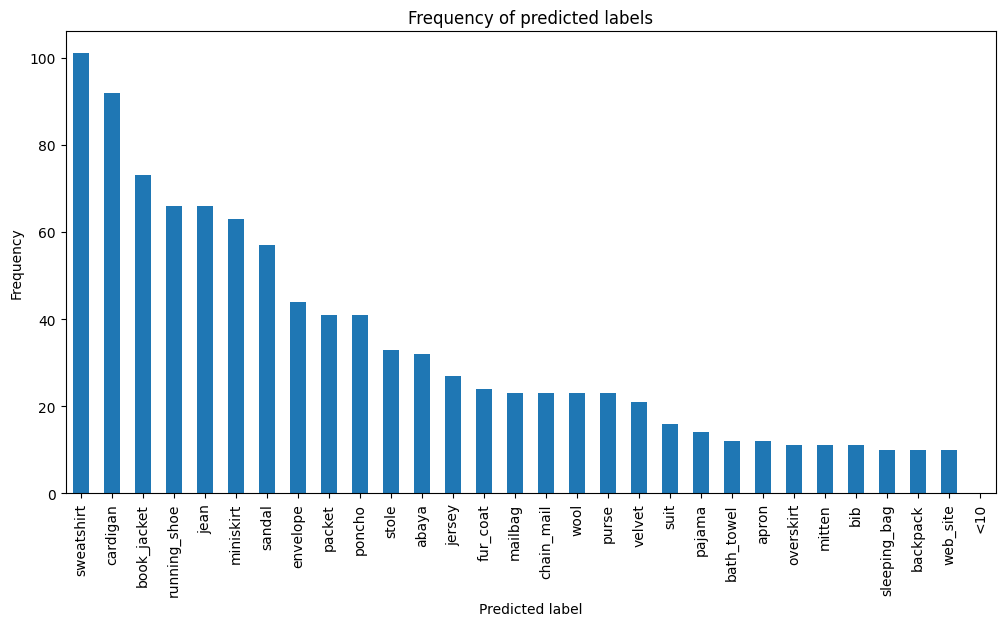

Number of items in each category: sweatshirt      101
cardigan         92
book_jacket      73
running_shoe     66
jean             66
miniskirt        63
sandal           57
envelope         44
packet           41
poncho           41
stole            33
abaya            32
jersey           27
fur_coat         24
mailbag          23
chain_mail       23
wool             23
purse            23
velvet           21
suit             16
pajama           14
bath_towel       12
apron            12
overskirt        11
mitten           11
bib              11
sleeping_bag     10
backpack         10
web_site         10
<10               0
dtype: int64


In [20]:
folder_path = 'Training-Images'
predict_folder_classes(model, folder_path)
